In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

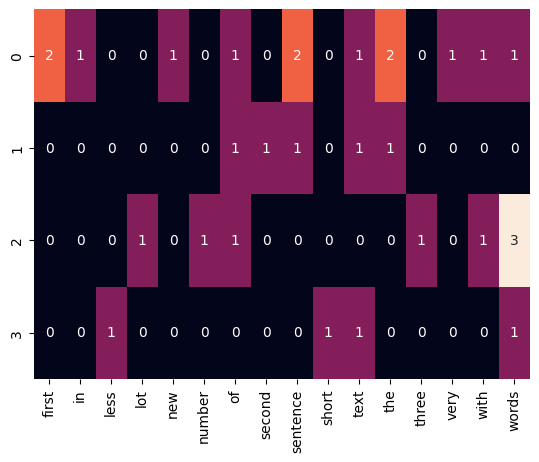

In [ ]:
vectorizer = CountVectorizer()
corpus = [
          'Text of the very first new sentence with the first words in sentence.',
          'Text of the second sentence.',
          'Number three with lot of words words words.',
          'Short text, less words.',
]
term_frequencies = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()
term_frequencies = term_frequencies.toarray()

sns.heatmap(term_frequencies, annot=True, cbar = False, xticklabels = vocab);

<Axes: >

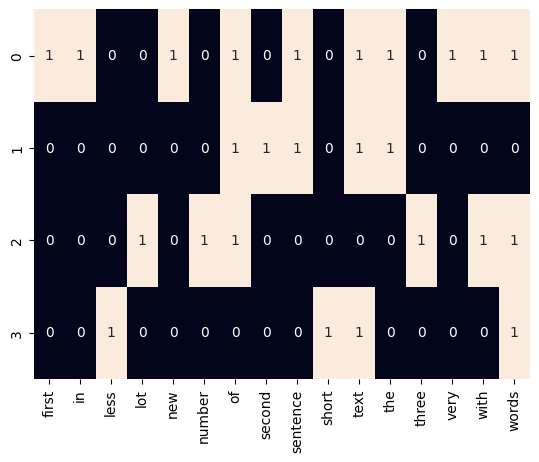

In [ ]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(one_hot, annot=True, cbar = False, xticklabels = vocab)

# TF-IDF
TF-IDF stands for **Term Frequency - Inverse Document Frequency**. It quantifies the importance of a term in a document relative to a corpus.

## 1. Term Frequency (TF)

The term frequency measures how often a term \( t \) appears in a document \( d \). One common normalization is:

$$
\text{TF}(t, d) = \frac{f_{t,d}}{\sum\limits_{t' \in d} f_{t',d}}
$$

Where:
- \( $f_{t,d}$ \) is the raw count of term \( t \) in document \( d \).
- The denominator is the total number of terms in document \( d \).

## 2. Inverse Document Frequency (IDF)

The inverse document frequency quantifies how rare or common a term is across all documents in the corpus. The basic formula is:

$$
\text{IDF}(t) = \log \left(\frac{N}{n_t}\right)
$$

Where:
- \( N \) is the total number of documents.
- \( $n_t$ \) is the number of documents that contain term \( t \).

A common smoothed version to avoid division by zero is:

$$
\text{IDF}(t) = \log \left(\frac{N + 1}{n_t + 1}\right) + 1
$$

## 3. Combining TF and IDF

The TF-IDF weight for a term \( t \) in document \( d \) is given by:

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$

This formula increases the weight for terms that are frequent in a document but infrequent across the entire corpus.

## 4. Representing Documents as Vectors

Each document \( d \) can be represented as a vector in a high-dimensional space where each dimension corresponds to a unique term in the vocabulary:

$$
\mathbf{v}_d = \big[ \text{TF-IDF}(t_1, d), \, \text{TF-IDF}(t_2, d), \, \ldots, \, \text{TF-IDF}(t_k, d) \big]
$$

Where:
- \( k \) is the size of the vocabulary.

These document vectors can be used to compute similarities (e.g., using cosine similarity) between documents.

---

**Summary:**

- **TF (Term Frequency):** Measures the frequency of a term in a document.
- **IDF (Inverse Document Frequency):** Measures how unique a term is across the corpus.
- **TF-IDF:** Combines both to give a weighted score that highlights important terms in a document.
- **Document Vectors:** Each document is represented as a vector of TF-IDF scores, which can be used for tasks like clustering, classification, or retrieval.

<Axes: >

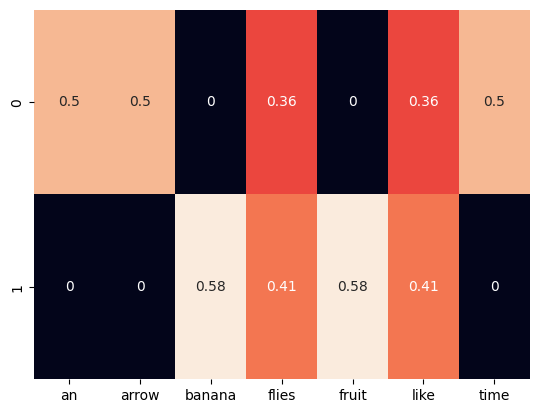

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(tfidf, annot=True, cbar = False, xticklabels = vocab)

In [ ]:
def load_glove_vectors(glove_file):
    embeddings = {}
    with open(glove_file, 'r', encoding='utf8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
    return embeddings

embeddings = load_glove_vectors("glove.6B.100d.txt")
print("Loaded {} words from GloVe.".format(len(embeddings)))

In [ ]:
def get_cosine_similarity(vec, matrix):
    vec = vec.reshape(1, -1)
    return cosine_similarity(vec, matrix)[0]

def most_similar(embeddings, target_vec, exclude_words=[], top_n=5):
    words = [w for w in embeddings.keys() if w not in exclude_words]
    matrix = np.stack([embeddings[w] for w in words])

    sim_scores = get_cosine_similarity(target_vec, matrix)
    top_indices = np.argsort(sim_scores)[::-1][:top_n]
    return [(words[i], sim_scores[i]) for i in top_indices]

In [ ]:
def perform_analogy(embeddings, word_a, word_b, word_c, normalize=True, top_n=5):
    vec_a = embeddings[word_a].copy()
    vec_b = embeddings[word_b].copy()
    vec_c = embeddings[word_c].copy()

    if normalize:
        vec_a = vec_a / np.linalg.norm(vec_a)
        vec_b = vec_b / np.linalg.norm(vec_b)
        vec_c = vec_c / np.linalg.norm(vec_c)

    target_vec = vec_a - vec_b + vec_c
    target_vec = target_vec / np.linalg.norm(target_vec)

    exclude_words = [word_a, word_b, word_c]
    similar_words = most_similar(embeddings, target_vec, exclude_words=exclude_words, top_n=top_n)
    return similar_words

results = perform_analogy(embeddings, "king", "man", "woman", top_n=5)
print("\nTop similar words for 'king' - 'man' + 'woman':")
for word, score in results:
    print("{:<15} {:.4f}".format(word, score))

Loaded 400000 words from GloVe.

Top similar words for 'king' - 'man' + 'woman':
queen           0.7699
monarch         0.6843
throne          0.6756
daughter        0.6595
princess        0.6521
